# Used Vehicle Selling Price Predication using Multiple Linear Regression

We predicate selling price of used vehicles by using multiple linear regression. For the same car dataset used which is downloaded from kaggle.

We divided work in following parts:

1.Importing dependencies and Load data

2.Exploratory Data Analysis(EDA)

3.Model creation

4.Model evaluation

In [77]:
#1.Importing dependencies and Load data
#1.1 Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [79]:
#1.2 Loading dataset
Car_data=pd.read_csv('car data.csv')
Car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
#2. Exploratory Data Analysis
Car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [80]:
#Data type of each feature
Car_data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [81]:
#Stastical Analysis of numerical feature
Car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [82]:
#Null value checking
Car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<AxesSubplot:>

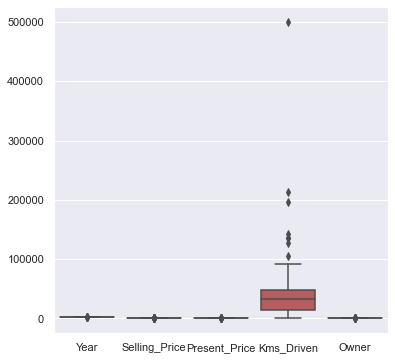

In [83]:
#Outlier detection using boxplot
sns.set(rc={"figure.figsize":(6,6)})
sns.boxplot(data=Car_data)

In [86]:
#Removal of outlieres using Z score method
Car_data['zscore']=(Car_data.Kms_Driven-Car_data.Kms_Driven.mean())/Car_data.Kms_Driven.std()
Car_data1=Car_data[~((Car_data['zscore']>3) | (Car_data['zscore']<-3))]
Car_data1

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,zscore
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,-0.255798
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0.155651
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,-0.772682
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,-0.816399
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0.141508
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,-0.076098
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,0.592817
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,1.311157
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,-0.718679


In [18]:
Car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,zscore
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,-0.255798
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0.155651
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,-0.772682
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,-0.816399
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0.141508
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,-0.076098
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,0.592817
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,1.311157
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,-0.718679


In [87]:
#zscore drop
Car_data1=Car_data1.drop('zscore',axis=1)
Car_data1

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [90]:
#Dropping the unwanted feature
Car_data1=Car_data1.drop(['Car_Name','Seller_Type'],axis=1)
Car_data1

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Manual,0
1,2013,4.75,9.54,43000,Diesel,Manual,0
2,2017,7.25,9.85,6900,Petrol,Manual,0
3,2011,2.85,4.15,5200,Petrol,Manual,0
4,2014,4.60,6.87,42450,Diesel,Manual,0
...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Manual,0
297,2015,4.00,5.90,60000,Petrol,Manual,0
298,2009,3.35,11.00,87934,Petrol,Manual,0
299,2017,11.50,12.50,9000,Diesel,Manual,0


In [91]:
#encoding using dummies method
Car_data1=pd.get_dummies(Car_data1)
Car_data1

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,1,0,1
1,2013,4.75,9.54,43000,0,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,0,1,0,1
4,2014,4.60,6.87,42450,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,0,1,0,1
298,2009,3.35,11.00,87934,0,0,0,1,0,1
299,2017,11.50,12.50,9000,0,0,1,0,0,1


<AxesSubplot:>

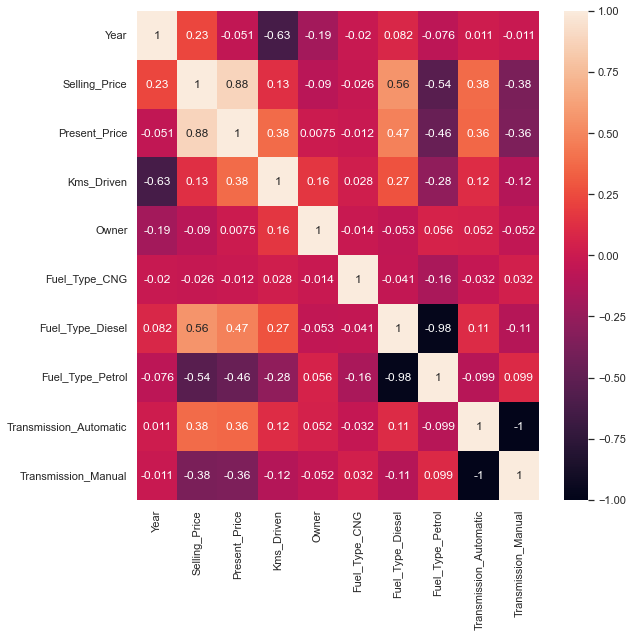

In [93]:
#Correlation between features
cor=Car_data1.corr()
plt.subplots(figsize=(9,9))
sns.heatmap(cor,annot=True)

In [53]:
#3 Model Creation
#Selection of independent and dependent feature
a=abs(cor['Selling_Price'])
result=a[a>0.2]
result

Year                      0.230593
Selling_Price             1.000000
Present_Price             0.879715
Fuel_Type_Diesel          0.556660
Fuel_Type_Petrol          0.544547
Transmission_Automatic    0.378577
Transmission_Manual       0.378577
Name: Selling_Price, dtype: float64

In [55]:
# X is independent and y is dependent(target) feature
X=Car_data1[['Year','Present_Price','Fuel_Type_Diesel','Fuel_Type_Petrol','Transmission_Automatic','Transmission_Manual']]
y=Car_data1[['Selling_Price']]

In [62]:
#Splitting the data and train the model
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.3,random_state=3)
lm=LinearRegression()
model=lm.fit(X_train,y_train)

In [65]:
# Model testing
y_pred=model.predict(X_test)

In [67]:
# Model Score
model.score(X_test,y_test)

0.8509557115416381

In [68]:
# Coefficient value(value of m in y=mx+c )
model.coef_

array([[ 0.49499089,  0.56974395,  0.7221727 , -0.7221727 , -0.04645283,
         0.04645283]])

In [94]:
# Intercepet Value(value of c in y=mx+c)
model.intercept_

array([-996.02250078])

In [70]:
#testing model using test values
model.predict([[2017,0.51,0,1,1,0]])

C:\Users\MADHURI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1.89607093]])

In [95]:
#4 Model Evaluation
# Using R-Square method
r2=r2_score(y_test,y_pred)
r2

0.8509557115416381

In [96]:
# Using Adjusted R- Square method
adj_r2 = 1-((1 - r2)*(len(Car_data1.columns)-1)/(len(Car_data1.columns)-len([X])-1))
adj_r2

0.8323251754843428

Score: 0.85

R-Square:0.85

Adjusted R-Square:0.83